IMPORTS

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
# Load df
df = pd.read_csv('cleaned.csv')
#df.drop(columns=['Unnamed: 0']) # Old index

In [3]:
df.head()
df.columns

Index(['Unnamed: 0', 'age', 'body_type', 'diet', 'drinks', 'drugs', 'height',
       'job', 'orientation', 'sex', 'smokes', 'status', 'diet_modifier',
       'education_status_extracted', 'education_institution_extracted',
       'ethnicities_pacific_islander', 'ethnicities_other',
       'ethnicities_black', 'ethnicities_indian', 'ethnicities_middle_eastern',
       'ethnicities_native_american', 'ethnicities_hispanic_/_latin',
       'ethnicities_asian', 'ethnicities_white', 'offspring_status',
       'offspring_future', 'pets_cats', 'pets_dogs', 'religion_type',
       'religion_modifier', 'sign_extracted', 'sign_modifier_extracted',
       'speaks_english', 'speaks_spanish', 'speaks_french', 'speaks_russian',
       'speaks_c++', 'speaks_chinese', 'speaks_tagalog', 'speaks_esperanto',
       'speaks_portuguese', 'speaks_japanese', 'speaks_lisp',
       'speaks_ukrainian', 'speaks_german', 'speaks_sanskrit', 'speaks_thai',
       'speaks_hindi', 'speaks_ancient', 'speaks_italian', '

In [4]:
# extract relevant data
df = df[['age', 'body_type', 'diet', 'drinks', 'drugs', 'height', 'orientation', 'sex', 'smokes', 'status', 'offspring_status', 'sign_extracted']]
df_ORIG = df.copy()

In [5]:
labels = cosine_similarity(df)[0] # simulate inputs: assume first row is user input and extrac cosine similarity
labels

array([1.        , 0.67617514, 0.83313213, ..., 0.79662344, 0.77855668,
       0.96626923])

In [6]:
SIMILAR_THRESHOLD = 0.8

In [7]:
labels = ['not similar' if x < SIMILAR_THRESHOLD else "similar" for x in labels]
labels

['similar',
 'not similar',
 'similar',
 'similar',
 'similar',
 'not similar',
 'similar',
 'similar',
 'not similar',
 'similar',
 'not similar',
 'similar',
 'similar',
 'not similar',
 'not similar',
 'not similar',
 'not similar',
 'not similar',
 'not similar',
 'not similar',
 'not similar',
 'similar',
 'not similar',
 'not similar',
 'not similar',
 'not similar',
 'similar',
 'not similar',
 'similar',
 'not similar',
 'not similar',
 'similar',
 'not similar',
 'similar',
 'similar',
 'not similar',
 'not similar',
 'not similar',
 'similar',
 'not similar',
 'similar',
 'not similar',
 'not similar',
 'similar',
 'not similar',
 'not similar',
 'not similar',
 'similar',
 'not similar',
 'similar',
 'not similar',
 'not similar',
 'not similar',
 'similar',
 'similar',
 'not similar',
 'similar',
 'not similar',
 'similar',
 'not similar',
 'similar',
 'similar',
 'not similar',
 'not similar',
 'not similar',
 'similar',
 'not similar',
 'similar',
 'not similar',
 'simila

In [8]:
# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [9]:
df['labels'] = labels
df.head()

,age,body_type,diet,drinks,drugs,height,orientation,sex,smokes,status,offspring_status,sign_extracted,labels
0,-1.089092,0,0,4,0,1.690080,2,1,1,3,0,4,similar
1,0.386157,2,3,2,2,0.423755,2,1,0,3,0,2,not similar
2,-0.140718,4,0,4,0,0.170490,2,1,0,3,0,8,similar
3,0.070032,1,0,4,0,0.170490,2,1,3,3,0,2,similar
4,0.175407,1,0,4,2,1.183550,2,1,0,3,0,7,similar


In [10]:
# append labels / target
finalDf = pd.concat([principalDf, df[['labels']]], axis = 1)

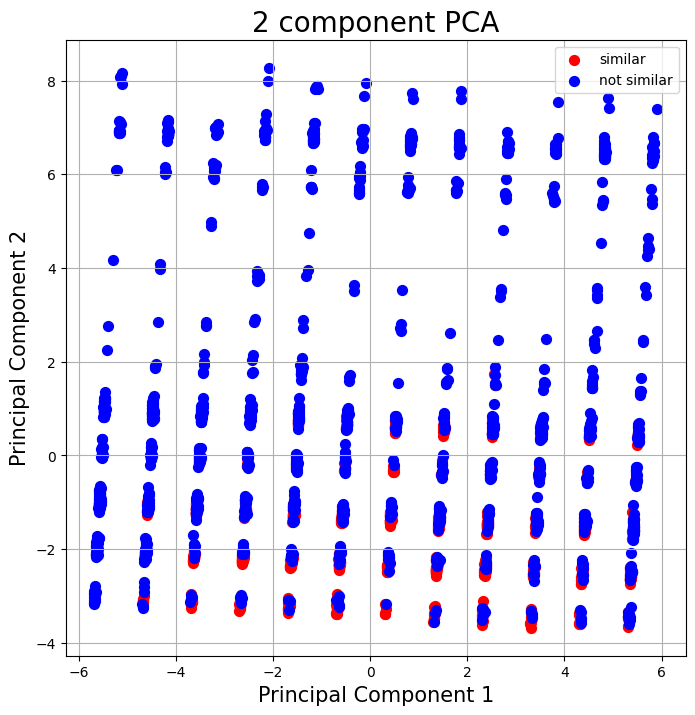

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['similar', 'not similar']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['labels'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

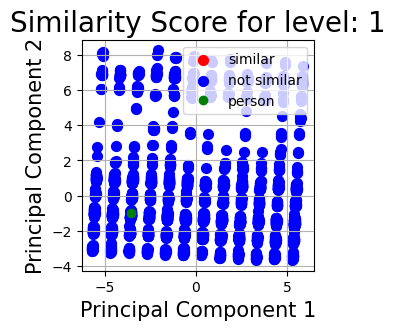

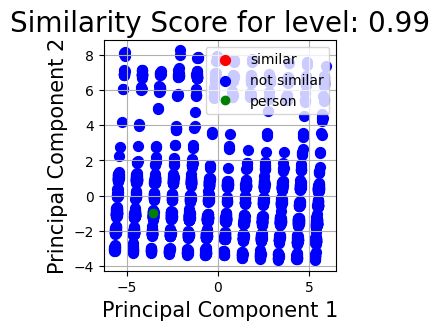

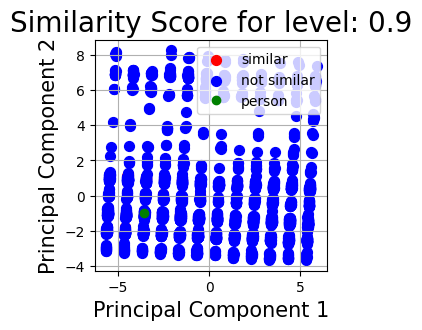

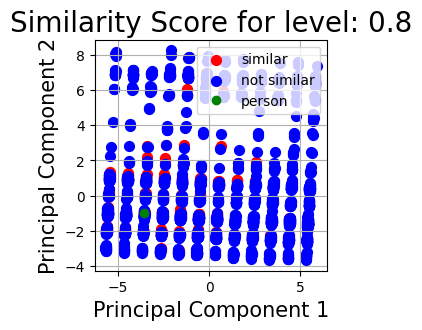

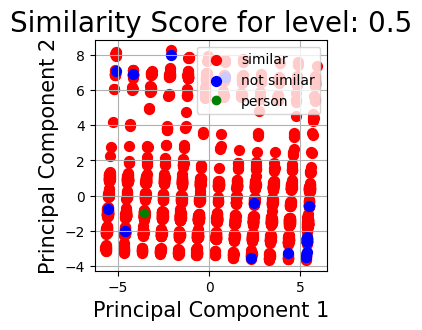

In [12]:
SIMILARITY_LEVELS=[1, 0.99, 0.9, 0.8, 0.5]
START_PERSON=1

for level in SIMILARITY_LEVELS:
    df = df_ORIG.copy()
    # generate lables
    # calcualte cosine similarity for first row
    labels = cosine_similarity(df)[START_PERSON]
    #print(df.iloc[0])

    # define label based on cosine score and similariy level
    labels = ['not similar' if x < level else "similar" for x in labels]

    # model
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])

    # append labels / target
    df['labels'] = labels
    df_labelled = pd.concat([principalDf, df[['labels']]], axis = 1)
    pca1x = df_labelled.iloc[START_PERSON]['principal component 1']
    pca2y = df_labelled.iloc[START_PERSON]['principal component 2']

    # plotting
    fig = plt.figure(figsize = (3,3))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('Similarity Score for level: {}'.format(level), fontsize = 20)
    targets = ['similar', 'not similar']
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = df_labelled['labels'] == target
        ax.scatter(df_labelled.loc[indicesToKeep, 'principal component 1']
                , df_labelled.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
    ax.plot(pca1x,pca2y,'go', label='person') 
    ax.legend(['similar', 'not similar', 'person'])

    ax.grid()

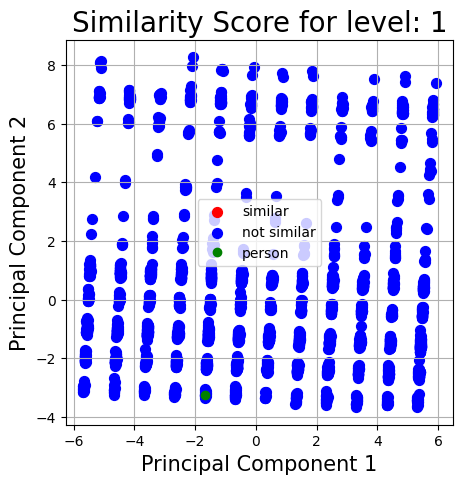

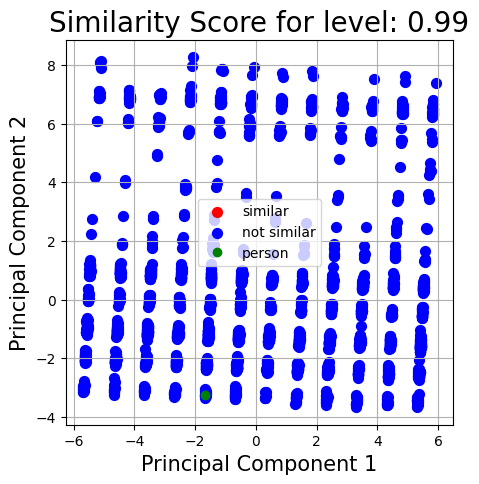

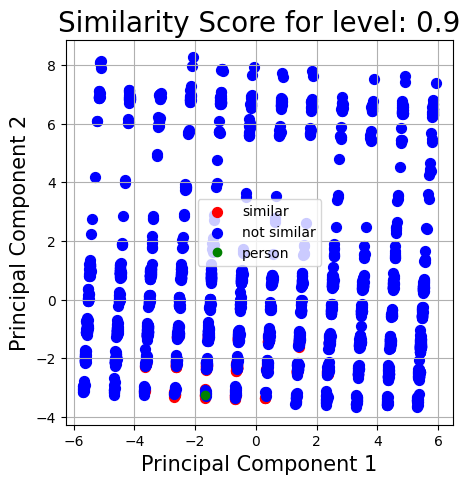

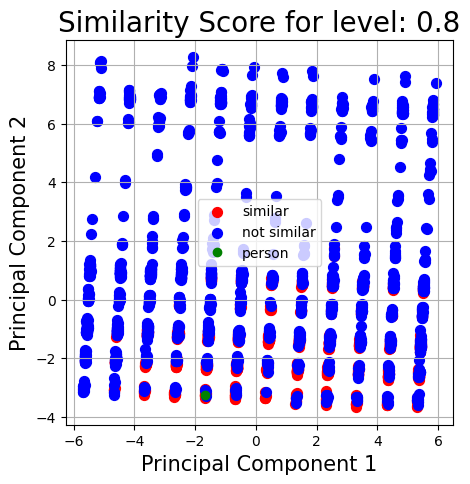

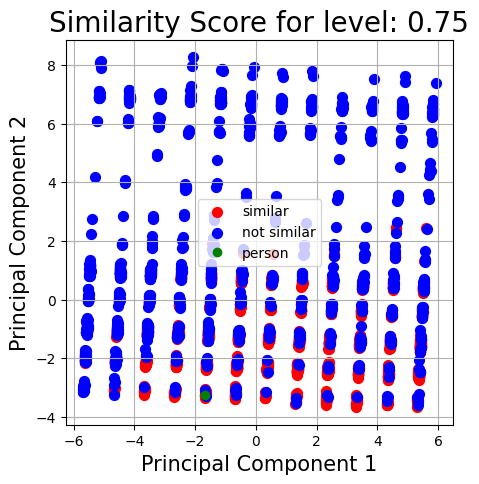

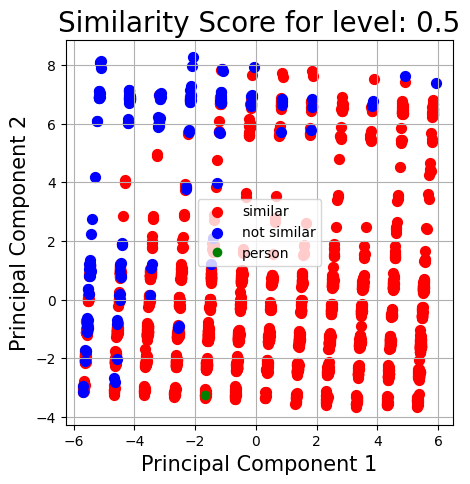

In [13]:
SIMILARITY_LEVELS=[1, 0.99, 0.9, 0.8, 0.75, 0.5]
START_PERSON=0
for person in range(0,1):
    for level in SIMILARITY_LEVELS:
        df = df_ORIG.copy()
        # generate lables
        # calcualte cosine similarity for first row
        labels = cosine_similarity(df)[person]
        #print(df.iloc[0])

        # define label based on cosine score and similariy level
        labels = ['not similar' if x < level else "similar" for x in labels]

        # model
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(df)
        principalDf = pd.DataFrame(data = principalComponents
                    , columns = ['principal component 1', 'principal component 2'])

        # append labels / target
        df['labels'] = labels
        df_labelled = pd.concat([principalDf, df[['labels']]], axis = 1)
        pca1x = df_labelled.iloc[person]['principal component 1']
        pca2y = df_labelled.iloc[person]['principal component 2']

        # plotting
        fig = plt.figure(figsize = (5,5))
        ax = fig.add_subplot(1,1,1)
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('Similarity Score for level: {}'.format(level), fontsize = 20)
        targets = ['similar', 'not similar']
        colors = ['r', 'b']
        for target, color in zip(targets,colors):
            indicesToKeep = df_labelled['labels'] == target
            ax.scatter(df_labelled.loc[indicesToKeep, 'principal component 1']
                    , df_labelled.loc[indicesToKeep, 'principal component 2']
                    , c = color
                    , s = 50)
        ax.plot(pca1x,pca2y,'go', label='person') 
        ax.legend(['similar', 'not similar', 'person'])
        fig.savefig('plots/similarity-plot-person-{}-level-{}.png'.format(person, level))
        ax.grid()

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
from preprocess import preprocess
import time
from tqdm import tqdm

df = pd.read_csv('../data/profiles_revised.csv')
all_columns = df.columns

COLS = ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'height', 'offspring', 'orientation', 'pets',
       'sex', 'sign', 'smokes', 'status']
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [15]:
df = pd.read_csv('../data/profiles_revised.csv')
COLS = ['age', 'body_type', 'drinks', 'drugs']

df = preprocess(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'], df)
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'height', 'income',
       'job', 'orientation', 'sex', 'smokes', 'status', 'diet_modifier',
       'education_status_extracted', 'education_institution_extracted',
       'ethnicities_native_american', 'ethnicities_middle_eastern',
       'ethnicities_pacific_islander', 'ethnicities_indian',
       'ethnicities_other', 'ethnicities_white', 'ethnicities_asian',
       'ethnicities_black', 'ethnicities_hispanic_/_latin', 'offspring_status',
       'offspring_future', 'pets_cats', 'pets_dogs', 'religion_type',
       'religion_modifier', 'sign_extracted', 'sign_modifier_extracted',
       'speaks_english', 'speaks_spanish', 'speaks_french', 'speaks_russian',
       'speaks_c++', 'speaks_chinese', 'speaks_tagalog', 'speaks_esperanto',
       'speaks_portuguese', 'speaks_japanese', 'speaks_lisp',
       'speaks_ukrainian', 'speaks_german', 'speaks_sanskrit', 'speaks_thai',
       'speaks_hindi', 'speaks_ancient', 'speaks_italian', 'spea

In [16]:
df.head()
print(df.shape)

(2299, 100)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.95      0.95      0.95       254

    accuracy                           0.96       690
   macro avg       0.96      0.96      0.96       690
weighted avg       0.96      0.96      0.96       690

[[423  13]
 [ 13 241]]


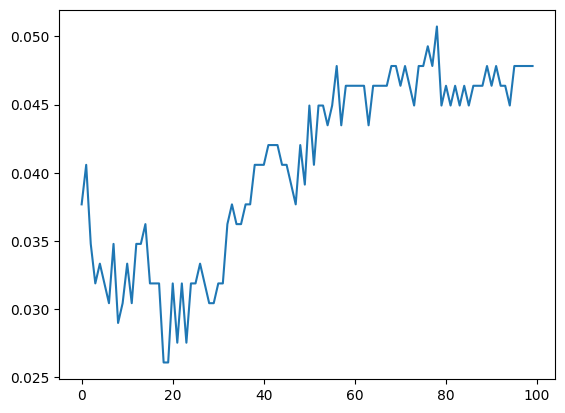

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


X = df

labels = cosine_similarity(df)[0]
labels = [0 if x < 0.75 else 1 for x in labels]

y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


error_rates = []

for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))
plt.plot(error_rates)
# i = 10 seems good

In [18]:
X = df

labels = cosine_similarity(df)[0]
labels = [0 if x < 0.75 else 1 for x in labels]

y = labels

In [19]:
print(X.head)

<bound method NDFrame.head of             age  body_type  diet  drinks  drugs    height  income  job  \
0     -1.089092          0     0       4      0  1.690080      -1   19   
1      0.386157          2     3       2      2  0.423755   80000    8   
22    -0.140718          4     0       4      0  0.170490      -1    7   
36     0.070032          1     0       4      0  0.170490      -1   17   
72     0.175407          1     0       4      2  1.183550  150000    0   
...         ...        ...   ...     ...    ...       ...     ...  ...   
59824 -0.667592         10     0       4      0 -0.336040      -1   17   
59838 -0.035343          4     0       4      2 -0.082775   50000   10   
59852 -0.456842          3     0       4      0 -0.589305      -1    2   
59902 -0.772967          3     3       3      0 -0.336040      -1   18   
59944 -0.667592          1     0       4      1  1.183550      -1   10   

       orientation  sex  ...  speaks_welsh  speaks_khmer  speaks_ilongo  \
0     